<a href="https://colab.research.google.com/github/leloman/cv/blob/main/assignment1Marco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Marco Antonio Cardoso Alvarez

Para desenvolver o trabalho abaixo, foi utilizado chatgpt, documentação dos pacotes e o stack overflow (https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion). O chatgpt foi utilizado para ter um protótipo do algoritmo principal e o protótipo de um algoritmo auxiliar que retirava colunas indesejadas e dados inválidos do conjunto de dados e também escrevia no arquivo de saída um número definido de linhas. As documentações foram úteis para compreender em mais detalhes o funcionamento dos métodos e classes utilizadas e o stack overflow serviu para buscar uma maneira de definir um número adequado de *clusters*.

Abaixo foram importados os pacotes necessários para o desenvolvimento do programa. O numpy para transformar os dados num numpyarray que permite a aplicação dos métodos seguintes, o pyplot para exibir o gráfico, o decomposition para executar o método de PCA, o cluster para que o algoritmo de k-means possa ser aplicado, o preprocessing para preparar os dados para o PCA através do método fit_transform() da classe StandardScaler, o pandas para ler o conjuto de dados e o método *silhouette_score* para achar um número adequado de clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import silhouette_score

Abaixo é importada a tabela de dados e inserida num NumPy Array. Os dados utilizados correspondem à um catálogo de galáxias chamado SuperCOSMOS (http://ssa.roe.ac.uk/allSky). O arquivo completo possui aproximadamente 24GB de dados. Para facilitar o upload e computação, foi selecionada apenas uma parte das galáxias, equivalendo à 10000 linhas de dados e foram removidos as entradas com qualquer uma das *features* que tivesse valor Nan. As *features* consideradas foram ra, dec (que definem a posição da galáxia no céu), Bmag, Rmag, Imag (que correspondem à intensidade da luz em diferentes bandas), Ebmv (o escurecimento e avermelhamento da luz emitida causados por poeira).

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/dados_COSMOS_Processados_10000.csv")
X = np.array(data)

Os dados devem ser normalizados para a aplicação do PCA. O método fit_transform() é responsável por essa normalização e vem através do objeto scaler, sendo este definido pela classe StandardScaler(). O método atua na criação do novo conjunto de dados X_normalized que é equivalente à X, mas normalizado através da expressão

X_normalized = (X - u) / s, onde 'u' é a média da amostra e 's' o desvio padrão da mesma.

In [3]:
scaler = StandardScaler()
X_normalized=scaler.fit_transform(X)

Para aplicação do PCA, é instanciado um objeto pca a partir da classe PCA, no qual o atributo n_components=2 define a dimensionalidade da análise, reduzindo o conjunto de *features* para 2. Foram realizadas tentativas frustradas para o caso n_components=3, pois por algum motivo o google colab não conseguiu exibir um plot 3d interativo (propriedade que eu julguei importante para facilitar a visualização de um plot 3d). O método fit_transform() realiza a redução de *features* no *dataset* normalizado e atribui o resultado à variável X_pca.

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

Agora devemos achar o número de clusters que nos traz clusters mais bem definidos. Para isso utilizaremos o método *Silhouette Coefficient* para números de cluters que variam de 2 a 10:

In [5]:
coefficients = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_pca)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    coefficients.append(sil_coeff)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Os *silhoutte coefficients* são armazenados no array *coefficients*, sendo que o número ideal de clusters corresponde ao valor da posição do maior coeficiente mais 2, visto que o loop no bloco anterior começa em 2 e o primeiro índice do array é 0. Para clusterizar o conjunto de dados é necessario instanciar o objeto *kmeans* da classe *KMeans* com seu parâmetro *n_clusters* sendo definido como comentado. O método *fit_predict()* aplicado ao conjunto de dados X_pca reduzido através do pca retorna uma lista de índices, sendo que a posição de cada índice corresponde à um dado do conjunto utilizado e o índice define à qual cluster o dado está relacionado.

In [6]:
n = (coefficients.index(max(coefficients))) + 2

kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


O *scatter plot* é feito e o atributo *clusters* garante que a cada instância de dado será feita a associação à um cluster.

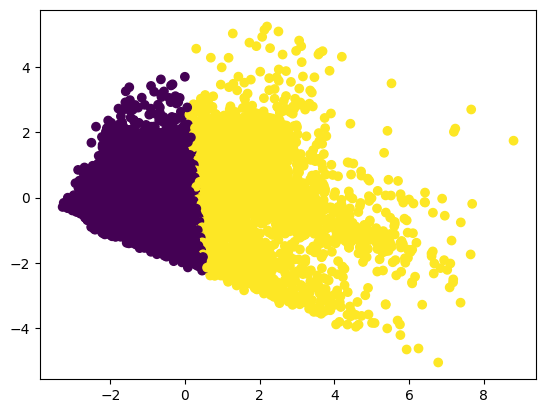

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

plt.show()